In [1]:
import pandas as pd # DataFrame işlemleri yapabileceğimiz kütüphanemiz

from sklearn.preprocessing import StandardScaler #Skitlearn ML kütüphanesi
from sklearn.model_selection import train_test_split # train ve test ayırma aracı
import pickle # model kaydetme aracı
import numpy # matrix işlemleri modülü 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # keras sequential modeli
from keras.layers import Dense, Dropout # keras nn katman fonksiyonları
from keras.wrappers.scikit_learn import KerasClassifier #skitlearn classifier modeli

# Train ve Test verilerini ics üniversitesi websitesinden çekiyoruz

In [ ]:
train=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/ann-train.data', header=None, sep=' ')

In [31]:
test=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/ann-test.data', header=None, sep=' ')

# Çektiğimiz verilere sütun isimlerini ekliyoruz 

In [32]:
column_list = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'Class']
train = pd.DataFrame(train.iloc[:,0:22].values, columns=column_list)
test = pd.DataFrame(test.iloc[:,0:22].values, columns=column_list)

In [33]:
train # train verisetimizi inceleyelim

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,0.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.00060,0.0150,0.120,0.082,0.146,3.0
1,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00025,0.0300,0.143,0.133,0.108,3.0
2,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00190,0.0240,0.102,0.131,0.078,3.0
3,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00090,0.0170,0.077,0.090,0.085,3.0
4,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00025,0.0260,0.139,0.090,0.153,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00006,0.0206,0.125,0.107,0.117,3.0
3768,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0250,0.125,0.114,0.109,3.0
3769,0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.01300,0.0174,0.123,0.099,0.124,2.0
3770,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00078,0.0206,0.106,0.088,0.121,3.0


In [34]:
test # test setimizi inceleyelim

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00610,0.0280,0.111,0.131,0.0850,2.0
1,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0190,0.084,0.078,0.1070,3.0
2,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.0310,0.239,0.100,0.2390,3.0
3,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00100,0.0180,0.087,0.088,0.0990,3.0
4,0.22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00040,0.0220,0.134,0.135,0.0990,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,0.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00250,0.0208,0.079,0.099,0.0800,3.0
3424,0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.10600,0.0060,0.005,0.089,0.0055,1.0
3425,0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00076,0.0201,0.090,0.067,0.1340,3.0
3426,0.35,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00280,0.0201,0.090,0.089,0.1010,3.0


In [5]:
train_X = train.drop(['Class'], axis=1)
train_y = train['Class']

In [6]:
test_X = test.drop(['Class'], axis=1) 
test_y = test['Class']

In [7]:
 X_train, X_validation, y_train, y_validation = train_test_split(train_X, train_y, test_size = 0.2, random_state = 1)  

In [73]:
sc = StandardScaler()
#eğitim verisini ölçeklendirelim
X_train = sc.fit_transform(train_X)
        
#test verisive validation verisinide ölçeklendirelim
X_validation = sc.transform(X_validation)

In [9]:
def classifier_model():
        """Bu kod ile Neural agimin katmanlarini ve ozniteliklerini belirleyerek modelimi olusturuyorum.
        Genelde cogu ANN'de kullanilan Kerasin Sequential() methodu ile modelimi kuruyorum. Modelime 48 dense ekliyorum ve girdi boyutunu 21 olarak ayarliyorum. Bunun sebebi verilerimizin 21 kategoriden olusmasi. Her kategorik veriyi bir girdi neuronuna bagliyorum. Aktivasyon fonksiyonu olarak ise Relu aktivasyon fonksiyonunu seciyorum.
        Her katmandan sonra 0.25 lik bir Dropout ekliyorum. Dropout eklememin sebebi modelimin veri setini ezberlemesinden kacindirmak yani her forward propagation asamasinda %0.25 lik veriyi unutuyorum bu sayede validation gercek dunya verilerine daha guzel fit edebilicek.
        iki 48 lik ara hidden layer daha ekledikten  sonra cikti katmanimi 3 layer olarak belirliyorum ve Aktivasyon fonksiyonunu softmax seciyorum. Softmax olasiliksal dagilim acisindan output katmaninda tam ihtiyacimiz olan araliga sahip ve olceklememize musait olan aktivasyon fonksiyonu oldugu icin bunu sectim.
        En son durumda modelimizi return ediyoruz

        """
        #Sequential model
        model = Sequential()
        
        #Girdi katmanı 21 boyutlu oluşturuyoruz
        model.add(Dense(48, kernel_initializer = 'uniform', input_dim=21, activation='relu'))
        
        #25% dropout ile neuronları öldürelim
        model.add(Dropout(0.25))
        
        #2. gizli katman
        model.add(Dense(48, kernel_initializer = 'uniform', activation='relu'))
        
        #25% dropout ile ezberlemeyi engelliyoruz
        model.add(Dropout(0.25))
        
        #3. gizli katman
        model.add(Dense(48, kernel_initializer = 'uniform', activation='relu'))
        
        #25% dropout 
        model.add(Dropout(0.25))
        
        # Çıkış katmanı
        model.add(Dense(3, kernel_initializer = 'uniform', activation='softmax'))
        
    	# Modeli oluşturuyoruz
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        return model

In [57]:
#Keras classifier üzerinde modeli oluşturuyoruz
classifier = KerasClassifier(build_fn = classifier_model, batch_size = 10, epochs = 100)

In [58]:
sc = StandardScaler()
#eğitim verisini ölçeklendiriyoruz
train_X = sc.fit_transform(train_X)
        
#test verisini eğitim verisi ölçeğine uyduruyoruz
test_X = sc.transform(test_X)

In [59]:
history=classifier.fit(train_X, train_y, batch_size = 10, epochs = 100)

Epoch 1/100
378/378 [==============================] - 1s 853us/step - loss: 0.2930 - accuracy: 0.9239
Epoch 2/100
378/378 [==============================] - 0s 717us/step - loss: 0.1480 - accuracy: 0.9300
Epoch 3/100
378/378 [==============================] - 0s 718us/step - loss: 0.1269 - accuracy: 0.9478
Epoch 4/100
378/378 [==============================] - 0s 829us/step - loss: 0.1115 - accuracy: 0.9544
Epoch 5/100
378/378 [==============================] - 0s 981us/step - loss: 0.0992 - accuracy: 0.9576
Epoch 6/100
378/378 [==============================] - 0s 733us/step - loss: 0.0902 - accuracy: 0.9616
Epoch 7/100
378/378 [==============================] - 0s 932us/step - loss: 0.0902 - accuracy: 0.9613
Epoch 8/100
378/378 [==============================] - 0s 887us/step - loss: 0.0862 - accuracy: 0.9645
Epoch 9/100
378/378 [==============================] - 0s 712us/step - loss: 0.0833 - accuracy: 0.9626
Epoch 10/100
378/378 [==============================] - 0s 743us/step - l

378/378 [==============================] - 0s 707us/step - loss: 0.0172 - accuracy: 0.9952
Epoch 80/100
378/378 [==============================] - 0s 726us/step - loss: 0.0212 - accuracy: 0.9939
Epoch 81/100
378/378 [==============================] - 0s 684us/step - loss: 0.0153 - accuracy: 0.9942
Epoch 82/100
378/378 [==============================] - 0s 710us/step - loss: 0.0187 - accuracy: 0.9958
Epoch 83/100
378/378 [==============================] - 0s 705us/step - loss: 0.0173 - accuracy: 0.9942
Epoch 84/100
378/378 [==============================] - 0s 760us/step - loss: 0.0153 - accuracy: 0.9950
Epoch 85/100
378/378 [==============================] - 0s 680us/step - loss: 0.0116 - accuracy: 0.9955
Epoch 86/100
378/378 [==============================] - 0s 681us/step - loss: 0.0150 - accuracy: 0.9950
Epoch 87/100
378/378 [==============================] - 0s 781us/step - loss: 0.0156 - accuracy: 0.9936
Epoch 88/100
378/378 [==============================] - 0s 815us/step - loss:

In [42]:
def map_pred_class(preditions):
    """Predictions girdisini alir ve tahmin degerlerine gore Tiroit durumu normal mi , subnormal mi yoksa Hipertroid mi bunu belirler ve bastirir.
    """
    pred_map = ['Normal'  if(x==3) else 'Subnormal' if (x==2) else 'HyperThyroid'  for x in preditions]
    return numpy.array(pred_map)

In [77]:
test_y

0       2.0
1       3.0
2       3.0
3       3.0
4       3.0
       ... 
3423    3.0
3424    1.0
3425    3.0
3426    3.0
3427    3.0
Name: Class, Length: 3428, dtype: float64

In [74]:
#Prediction
y_test_pred = classifier.predict(X_validation)

#Confustion matrix from predictions
cm = confusion_matrix(test_y, y_test_pred)
#Map predictions to class name
y_test_pred = map_pred_class(y_test_pred)

print("\n............Predictions............\n")
print(y_test_pred.reshape(-1,1))
print("\nTest Data - Accuracy is %.3f%% \n" % ((cm[0][0]+cm[1][1]+cm[2][2])*100/test_y.size))


ValueError: Found input variables with inconsistent numbers of samples: [3428, 755]

In [ ]:
#Prediction
y_test_pred = classifier.predict(v)

#Confustion matrix from predictions
cm = confusion_matrix(test_y, y_test_pred)
#Map predictions to class name
y_test_pred = map_pred_class(y_test_pred)

print("\n............Predictions............\n")
print(y_test_pred.reshape(-1,1))
print("\nTest Data - Accuracy is %.3f%% \n" % ((cm[0][0]+cm[1][1]+cm[2][2])*100/test_y.size))



In [44]:
#Eğitim Modelini Bilgisayarımıza kaydediyoruz

json_model = classifier.model.to_json() # JSON olarak ve
open('model_architecture.json', 'w').write(json_model) 
classifier.model.save_weights('model_weights.h5', overwrite=True) # h5 formatında
print("\nModel is saved..\n")


Model is saved..



In [48]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

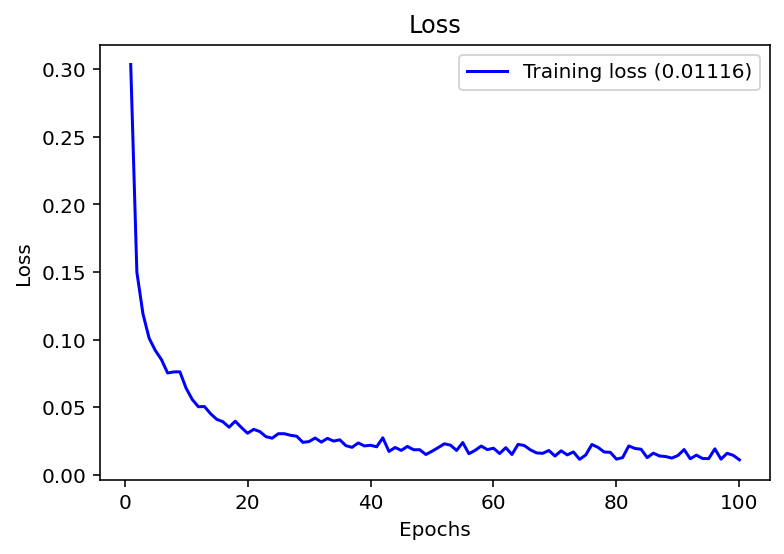

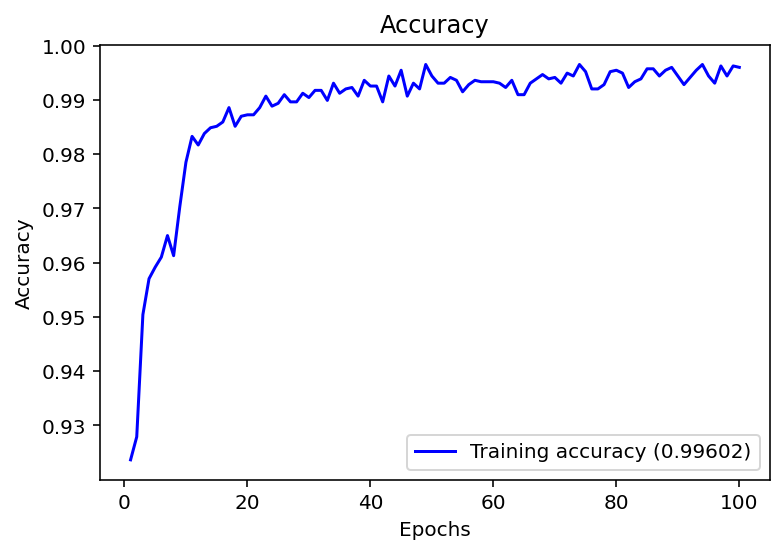

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plot_history(history)